In [1]:
# import liabraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Original dataset without expected time 

In [ ]:
# read data from csv file
data = pd.read_csv('September_2024.csv')
data.head()

,Stop Code,Stop Name,Direction,Route Name,Vehicle,ActualTime,Start Trip Time,Passengers In,Passengers Out,Passengers Transfer,Actual Bus Occupancy,Business Day,daily_order_trip_id,stop_code,stop_lat,stop_lon,month
0,1834.0,Hotel Dieu Grace Healthcare,EASTBOUND,418 EXPRESS,8069,2024-09-03 06:45:50,2024-09-03 06:45:50,1,0,1,1,2024-09-03,1,1834.0,42.286447,-83.064606,September
1,2090.0,Prince at College,EASTBOUND,418 EXPRESS,8069,2024-09-03 06:49:02,2024-09-03 06:45:50,0,0,0,1,2024-09-03,1,2090.0,42.289898,-83.075598,September
2,9622.0,Peter at Chippawa,EASTBOUND,418 EXPRESS,8069,2024-09-03 06:50:45,2024-09-03 06:45:50,0,0,0,1,2024-09-03,1,NaN,NaN,NaN,September
3,9623.0,Peter at Brock,EASTBOUND,418 EXPRESS,8069,2024-09-03 06:51:18,2024-09-03 06:45:50,0,0,0,1,2024-09-03,1,NaN,NaN,NaN,September
4,1222.0,Wyandotte at Mill,EASTBOUND,418 EXPRESS,8069,2024-09-03 06:52:24,2024-09-03 06:45:50,2,0,2,3,2024-09-03,1,1222.0,42.300790,-83.070978,September


Build heatmap for original dataset

In [3]:
# check the data types of the columns and make corelation matrix
num_data = data.select_dtypes(include=[np.number])
corr_matrix = num_data.corr()

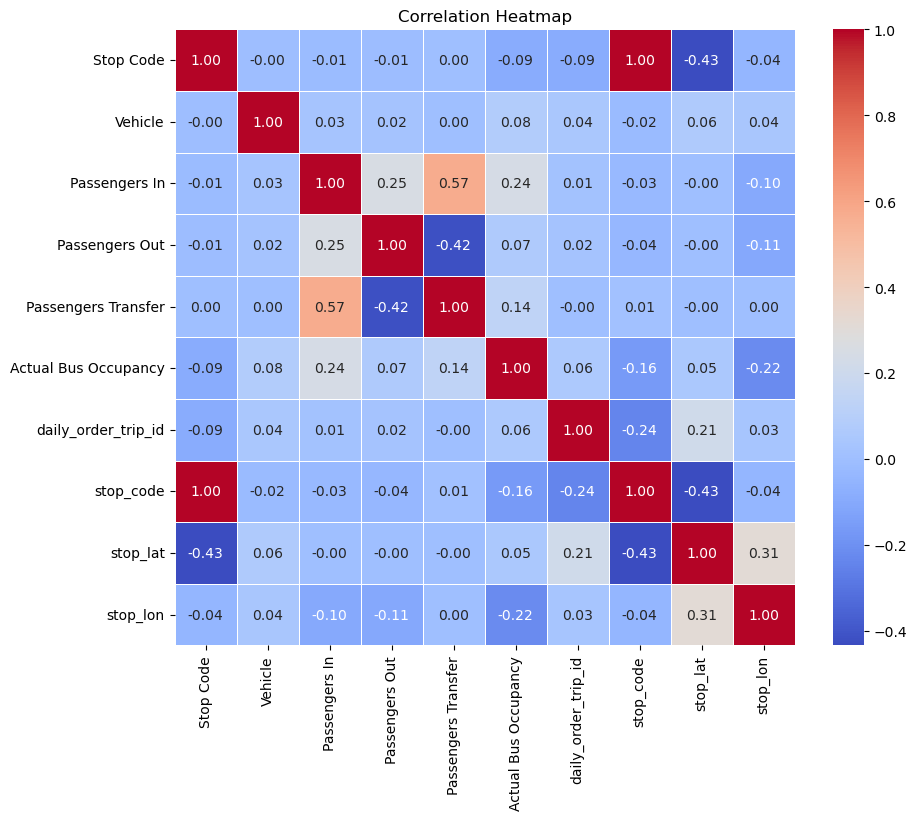

In [4]:
# check for numerical columns correlation 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Convert columns datatypes

In [5]:
# check the columns that are not numerical
print(corr_matrix.columns)
print(data.columns)

Index(['Stop Code', 'Vehicle', 'Passengers In', 'Passengers Out',
       'Passengers Transfer', 'Actual Bus Occupancy', 'daily_order_trip_id',
       'stop_code', 'stop_lat', 'stop_lon'],
      dtype='object')
Index(['Stop Code', 'Stop Name', 'Direction', 'Route Name', 'Vehicle',
       'ActualTime', 'Start Trip Time', 'Passengers In', 'Passengers Out',
       'Passengers Transfer', 'Actual Bus Occupancy', 'Business Day',
       'daily_order_trip_id', 'stop_code', 'stop_lat', 'stop_lon', 'month'],
      dtype='object')


In [6]:
# get the columns names that are not in the correlation matrix
diff_columns = [col for col in data.columns if col not in corr_matrix.columns]
diff_columns


['Stop Name',
 'Direction',
 'Route Name',
 'ActualTime',
 'Start Trip Time',
 'Business Day',
 'month']

In [7]:
# extract the numerical values from the Route Name 
data['Route Name'] = data['Route Name'].str.extract(r'(\d+)')

In [8]:
# extract the numerical values from the Direction
data['Direction'].value_counts()

mapping = {'EASTBOUND':0, 'WESTBOUND': 1,'SOUTHBOUND':2, 'NORTHBOUND':3,'WEST':1,'EAST':0}
data['Direction'] = data['Direction'].map(mapping)

In [10]:
# extract the weekday and weekend from the Business Day
# data['Actual Day'] = pd.to_datetime(data['ActualTime']).dt.day
# data['Start Day'] = pd.to_datetime(data['Start Trip Time']).dt.day
data['dayofweek'] =  pd.to_datetime(data['Business Day']).dt.dayofweek
# apply 1 as weekday,0 as weekend
data['daytype'] = data['dayofweek'].apply(lambda x: 1 if x < 5 else 0)

# extract the day from the Business Day
data['day'] = pd.to_datetime(data['Business Day']).dt.day

In [11]:
# extract the hour from ActualTime
data['Hour'] = pd.to_datetime(data['ActualTime']).dt.hour

# define a function to categorize hours into periods
# 5-12 morning, 12-17 afternoon, 17-21 evening, 21-5 night
def categorize_period(hour):
    if 5 <= hour < 12:
        return '0'
    elif 12 <= hour < 17:
        return '1'
    elif 17 <= hour < 21:
        return '2'
    else:
        return '3'

# apply the function to create a new column 'Period'
data['Period'] = data['Hour'].apply(categorize_period).astype(int)

Build new corelation heatmap for converted datatype columns 

In [12]:
# create a new numerical data and correlation matrix
new_num_data = data.select_dtypes(include=[np.number])
new_corr_matrix = new_num_data.corr()

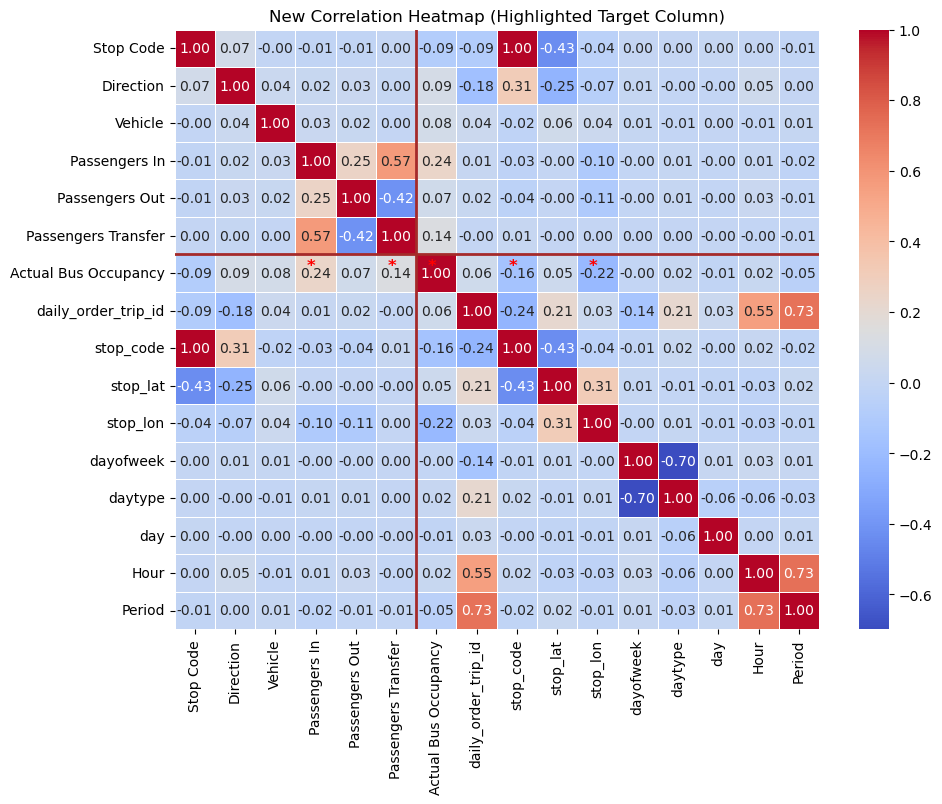

In [13]:
# check for numerical columns correlation 
plt.figure(figsize=(10, 8))
sns.heatmap(new_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# get the target variable correlation values
target_col = 'Actual Bus Occupancy'
target_corr_values = new_corr_matrix[target_col]

# find the indices of the columns that have a correlation value greater than 0.1
highlight_indices = np.where(np.abs(target_corr_values) > 0.1)[0]

# add a mark on the cell where the absolute value of the correlation of the target column is greater than 0.1
for idx in highlight_indices:
    # get the index of the target column and the column of the current correlation value
    row_idx = new_corr_matrix.index.get_loc(target_col)
    col_idx = new_corr_matrix.columns.get_loc(target_corr_values.index[idx])
    
    #  add a red asterisk (*) as a mark in the center of the cell
    plt.text(col_idx + 0.5, row_idx + 0.5, '*', color='red', ha='right', va='bottom', fontsize=12, fontweight='bold')

#  highlight the target column
plt.axhline(y=new_corr_matrix.index.get_loc(target_col), color='brown', linewidth=2)
plt.axvline(x=new_corr_matrix.columns.get_loc(target_col), color='brown', linewidth=2)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.title("New Correlation Heatmap (Highlighted Target Column)")
plt.show()

Set the correlation value threshold to 0.1, the feature columns are `passenger in`,`passenger transfer`, `stop_code` and `stop_lon`

## Correlation with expected time 

In [13]:
# read expected time data
df = pd.read_csv(r"E:\Desktop\Semester4\Capstone\cleaned_dataset\September_2024_epct.csv")
df.head()

,Stop Code,Stop Name,Direction,Route Name,Vehicle,ActualTime,Start Trip Time,Passengers In,Passengers Out,Passengers Transfer,Actual Bus Occupancy,Business Day,daily_order_trip_id,stop_code,stop_lat,stop_lon,stop_sequence,month,expected_arrival_time
0,2263.0,St Clair College Front Entrance,EASTBOUND,518 EXPRESS,8012,2024-09-01 09:47:43,2024-09-01 09:47:43,8,0,8,8,2024-09-01,1,2263.0,42.246094,-83.017841,1,9,2024-09-01 09:47:43
1,1777.0,Dougall at Nottingham Walmart,EASTBOUND,518 EXPRESS,8012,2024-09-01 10:01:53,2024-09-01 09:47:43,4,7,5,5,2024-09-01,1,1777.0,42.269944,-83.011800,2,9,2024-09-01 09:54:39
2,2262.0,Devonshire Mall at Cineplex,EASTBOUND,518 EXPRESS,8012,2024-09-01 10:07:20,2024-09-01 09:47:43,0,1,-1,4,2024-09-01,1,2262.0,42.273538,-82.999530,3,9,2024-09-01 09:58:18
3,2260.0,Tecmseh Mall Rear Entrance,EASTBOUND,518 EXPRESS,8012,2024-09-01 10:23:59,2024-09-01 09:47:43,0,4,-4,0,2024-09-01,1,2260.0,42.315908,-82.936701,4,9,2024-09-01 10:09:24
4,2263.0,St Clair College Front Entrance,EASTBOUND,518 EXPRESS,8062,2024-09-01 10:23:57,2024-09-01 10:23:57,0,0,0,0,2024-09-01,2,2263.0,42.246094,-83.017841,1,9,2024-09-01 10:23:57


In [14]:
num_data2 = df.select_dtypes(include=[np.number])
# since column month is a fixed value, we can drop it
corr_matrix2 = num_data2.drop(columns=['month']).corr()

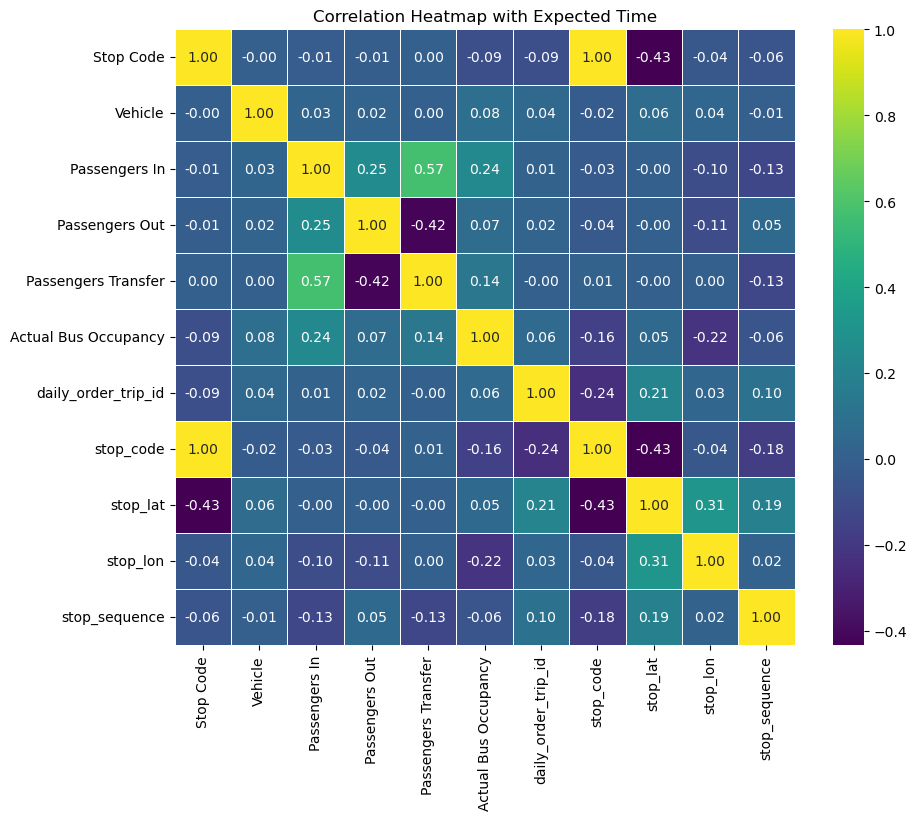

In [15]:
# check for numerical columns correlation 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Expected Time")
plt.show()

In [16]:
# check the columns that are not numerical
print(corr_matrix2.columns)
print(df.columns)

Index(['Stop Code', 'Vehicle', 'Passengers In', 'Passengers Out',
       'Passengers Transfer', 'Actual Bus Occupancy', 'daily_order_trip_id',
       'stop_code', 'stop_lat', 'stop_lon', 'stop_sequence'],
      dtype='object')
Index(['Stop Code', 'Stop Name', 'Direction', 'Route Name', 'Vehicle',
       'ActualTime', 'Start Trip Time', 'Passengers In', 'Passengers Out',
       'Passengers Transfer', 'Actual Bus Occupancy', 'Business Day',
       'daily_order_trip_id', 'stop_code', 'stop_lat', 'stop_lon',
       'stop_sequence', 'month', 'expected_arrival_time'],
      dtype='object')


In [17]:
# get the columns names that are not in the correlation matrix
diff_columns2 = [col for col in df.columns if col not in corr_matrix2.columns]
diff_columns2

['Stop Name',
 'Direction',
 'Route Name',
 'ActualTime',
 'Start Trip Time',
 'Business Day',
 'month',
 'expected_arrival_time']

In [18]:
# extract the numerical values from the Route Name 
df['Route Name'] = df['Route Name'].str.extract(r'(\d+)')

# extract the numerical values from the Direction
df['Direction'].value_counts()
mapping = {'EASTBOUND':0, 'WESTBOUND': 1,'SOUTHBOUND':2, 'NORTHBOUND':3,'WEST':1,'EAST':0}
df['Direction'] = df['Direction'].map(mapping)

In [19]:
# extract the weekday and weekend from the Business Day
# data['Actual Day'] = pd.to_datetime(data['ActualTime']).dt.day
# data['Start Day'] = pd.to_datetime(data['Start Trip Time']).dt.day
df['dayofweek'] =  pd.to_datetime(df['Business Day']).dt.dayofweek
# apply 1 as weekday,0 as weekend
df['daytype'] = df['dayofweek'].apply(lambda x: 1 if x < 5 else 0)

# extract the day from the Business Day
df['day'] = pd.to_datetime(df['Business Day']).dt.day

In [20]:
# extract the hour from ActualTime
df['Hour'] = pd.to_datetime(df['ActualTime']).dt.hour

# define a function to categorize hours into periods
# 5-12 morning as 0, 12-17 afternoon as 1, 17-21 evening as 2, 21-5 night as 3
def categorize_period(hour):
    if 5 <= hour < 12:
        return '0'
    elif 12 <= hour < 17:
        return '1'
    elif 17 <= hour < 21:
        return '2'
    else:
        return '3'

# apply the function to create a new column 'Period'
df['Period'] = df['Hour'].apply(categorize_period).astype(int)

In [21]:
# create a new column shows difference between Actual bus time and Expected bus time
df['DiffTime'] = pd.to_datetime(df['ActualTime']) - pd.to_datetime(df['expected_arrival_time'])
df['DiffTime'] = df['DiffTime'].dt.total_seconds()


In [22]:
# create a new numerical data and correlation matrix
new_num_data2 = df.select_dtypes(include=[np.number])
new_corr_matrix2 = new_num_data2.drop(columns=['month']).corr()

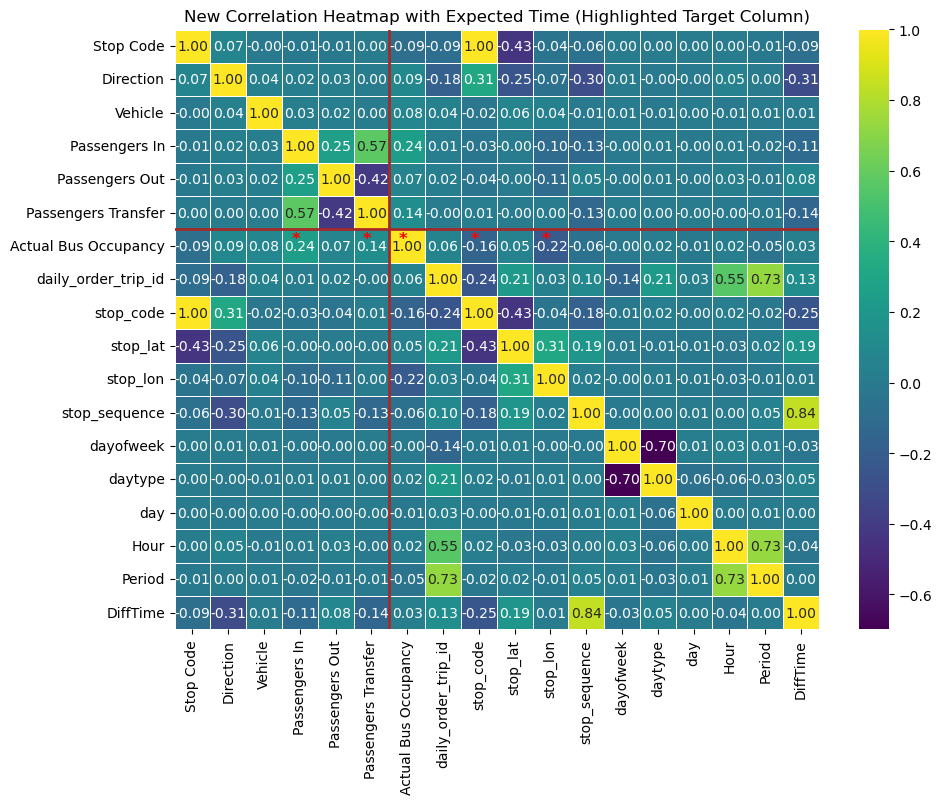

In [47]:
# correlation heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(new_corr_matrix2, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

# get the target column
target_col_new = 'Actual Bus Occupancy'
target_corr_values_new = new_corr_matrix2[target_col]

# find the indices where the absolute correlation value is greater than 0.1
highlight_indices = np.where(np.abs(target_corr_values_new) > 0.1)[0]

# add a mark on the cell where the absolute value of the correlation of the target column is greater than 0.1
for idx in highlight_indices:
    # get the index of the target column and the column of the current correlation value
    row_idx = new_corr_matrix2.index.get_loc(target_col_new)
    col_idx = new_corr_matrix2.columns.get_loc(target_corr_values_new.index[idx])
    
    #  add a red asterisk (*) as a mark in the center of the cell
    plt.text(col_idx + 0.5, row_idx + 0.5, '*', color='red', ha='right', va='bottom', fontsize=12, fontweight='bold')

#  highlight the target column
plt.axhline(y=new_corr_matrix2.index.get_loc(target_col), color='brown', linewidth=2)
plt.axvline(x=new_corr_matrix2.columns.get_loc(target_col), color='brown', linewidth=2)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.title("New Correlation Heatmap with Expected Time (Highlighted Target Column)")
plt.show()

Set the correlation value threshold to 0.1, the feature columns are `passenger in`,`passenger transfer`, `stop_code` and `stop_lon`,the `expected_arrival_time` can be little impact on `actual bus occupancy` under this threshold, because the `DiffTime` is calculated from it and the correlation value is only 0.03.